# Adaptive PMC ABC
This example shows you how to perform adaptive PMC ABC on a time series from the stochastic degradation model.


In [1]:
import pints
import pints.toy as toy
import pints.plot
import pints.toy.stochastic
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.stochastic.DegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 20)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.0], [0.3])


# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

## Fit using Rejection ABC

In [4]:
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(10)

# set p_acc_min
abc.sampler().set_p_acc_min(0.05)

# set target number of samples
abc.set_nr_samples(20)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
w_mean=[0.10646939]
epsilon=3.556683848755748
w_mean=[0.09796523]
epsilon=2.692582403567252
w_mean=[0.09489508]
epsilon=2.280350850198276
w_mean=[0.09184327]
epsilon=2.0615528128088303
w_mean=[0.09211735]
epsilon=1.8841443681416772
w_mean=[0.09152849]
epsilon=1.7888543819998317
w_mean=[0.09094832]
epsilon=1.7029386365926402
w_mean=[0.09092509]
epsilon=1.6431676725154984
w_mean=[0.0901903]
epsilon=1.5968719422671314
w_mean=[0.08913318]
epsilon=1.5491933384829668
w_mean=[0.08994564]
epsilon=1.5165750888103102
w_mean=[0.08955343]
epsilon=1.4832396974191326
w_mean=[0.08927977]
epsilon=1.449137674618944
w_mean=[0.08971008]
epsilon=1.4317821063276355
w_mean=[0.0896722]
epsilon=1.3964240043768943
w_mean=[0.0896742]
epsilon=1.3784048752090223
w_mean=[0.08973347]
epsilon=1.3784048752090223
w_mean=[0.08942398]
Iter. Eval. Acceptance rate Time m:s
1     19     54.42105263158  13:36.0
Halting: target number of samples (1034) reached.
Do

## Plot approximate posterior vs actual parameter value

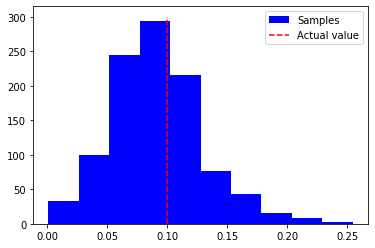

In [6]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=300, label="Actual value", color="red")
plt.legend()
plt.show()